Carga de librerías

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Función Ackley

In [2]:
def eval_ackley(X0, X1, a=20, b=0.2, c=2*np.pi):
    """
    Params:
    X0: ndarray shape nxm, x0 grid
    X1: ndarray shape pxq, x1 grid
    a, b, c: Ackley coefs
    """
    X_coord_pairs = np.hstack((X0.reshape(-1,1), X1.reshape(-1,1)))
    d = X_coord_pairs[0].shape[0]
    
    z = -a*np.exp( -b*np.sqrt(( X_coord_pairs**2 ).sum(axis=1) / d) )
    z += -np.exp( ( np.cos(c*X_coord_pairs) ).sum(axis=1)/d ) + a + np.e
                  
    return z.reshape(X0.shape)

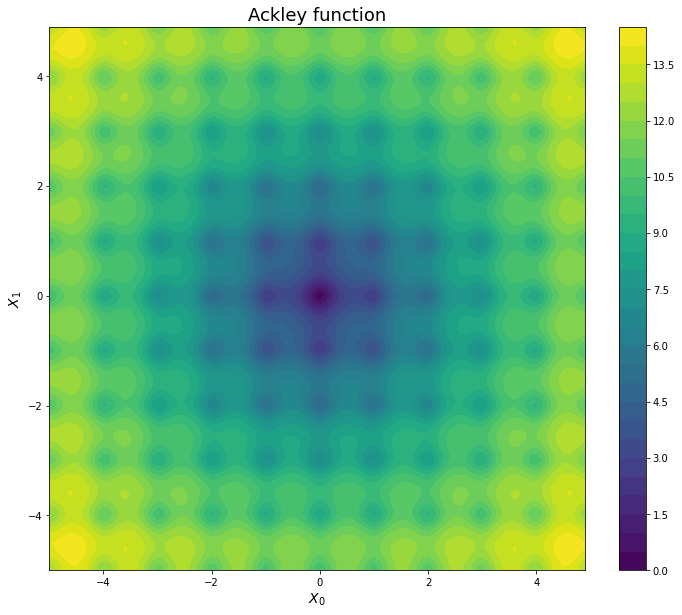

In [3]:
#Mesh elements
x0, x1 = np.mgrid[-5:5:0.1, -5:5:0.1]

#Eval ackley function
z = eval_ackley(X0=x0, X1=x1)

#Plot mesh
fig, ax = plt.subplots(figsize=(12,10))

cs = ax.contourf(x0, x1, z, 30)

#Style and annotations
fig.colorbar(cs)
ax.set_title("Ackley function", fontsize=18)
ax.set_xlabel(r"$X_0$", fontsize=14)
ax.set_ylabel(r"$X_1$", fontsize=14)

plt.show()

Se genera función Ackley para probar el algoritmo

In [4]:
def annealing_schedule(t):
    return 0.9*t

def ackley(a=20, b=0.2, c=2*3.14159):
    def ackley_implementation(x):
        d = len(x)
        return -a*math.exp(-b*math.sqrt(sum(np.power(x, 2)/d))) - math.exp(sum(math.cos(c*xi) for xi in x)/d) + a + math.exp(1)
    return ackley_implementation

def simulated_annealing(f, x=10, T=None, t=annealing_schedule, k_max=1000, temp=100):
    y = f([x])
    x_best, y_best = x, y
    path_array = np.array([x, y])
    
    for k in range(k_max):
        delta_x = np.random.uniform(-2,2)   
        x_new = x + delta_x
        y_new = f([x_new])
        delta_y = y_new - y
        temp = annealing_schedule(temp)
        selecting = np.random.uniform()
        
        coord = np.array([x_new, y_new])
        path_array = np.vstack((path_array, coord))
        
        if delta_y <= 0 or selecting < math.exp(-delta_y/temp):
            x, y = x_new, y_new
        if y_new < y_best:
            x_best, y_best = x_new, y_new
    return (x_best, y_best), path_array

Hacemos simulaciones y visualizamos el recorrido del algoritmo

In [5]:
best, coords = simulated_annealing(
    f=ackley(), 
    x=2, 
    T=None, 
    t=annealing_schedule, 
    k_max=150, 
    temp=100)

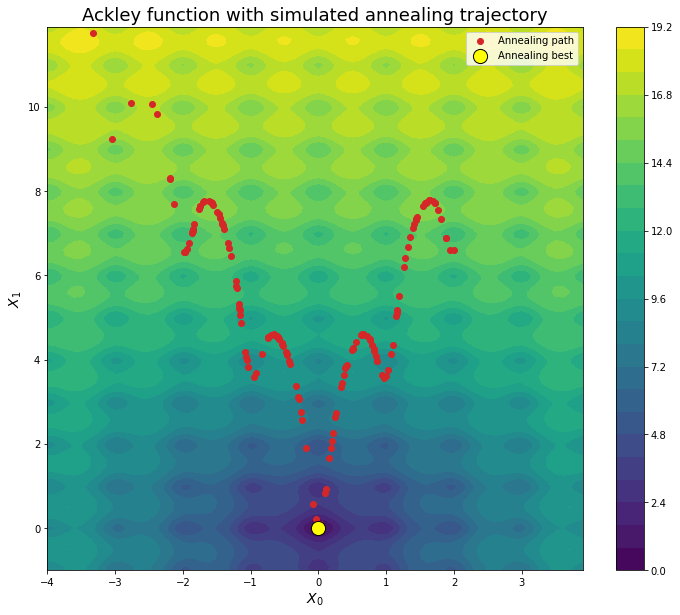

In [8]:
#Mesh elements
xmin, xmax = np.ceil(coords[:,0].min())-1, np.ceil(np.abs(coords[:,0]).max())
ymax = np.ceil(np.abs(coords[:,1]).max())
x0, x1 = np.mgrid[xmin:xmax:0.1, -1:ymax:0.1]

#Eval ackley function
z = eval_ackley(X0=x0, X1=x1)

#Plot mesh
fig, ax = plt.subplots(figsize=(12,10))

#Ackley func heatmap
cs = ax.contourf(x0, x1, z, 30)

#Style and annotations
fig.colorbar(cs)
ax.set_title("Ackley function with simulated annealing trajectory", fontsize=18)
ax.set_xlabel(r"$X_0$", fontsize=14)
ax.set_ylabel(r"$X_1$", fontsize=14)

ax.scatter(x=coords[:,0], y=coords[:,1], color='tab:red', label='Annealing path')
ax.scatter(x=best[0], y=best[1], s=200, color='yellow', edgecolors='black', label='Annealing best')
ax.legend()

plt.show()

### GIF

In [6]:
#Mesh elements
xmin, xmax = np.ceil(coords[:,0].min())-1, np.ceil(np.abs(coords[:,0]).max())
ymax = np.ceil(np.abs(coords[:,1]).max())
x0, x1 = np.mgrid[xmin:xmax:0.1, -1:ymax:0.1]

#Eval ackley function
z = eval_ackley(X0=x0, X1=x1)

#Plot mesh
fig, ax = plt.subplots(figsize=(12,10))

#Ackley func heatmap
cs = ax.contourf(x0, x1, z, 30)

#Style and annotations
fig.colorbar(cs)
ax.set_title("Ackley function with simulated annealing trajectory", fontsize=18)
ax.set_xlabel(r"$X_0$", fontsize=14)
ax.set_ylabel(r"$X_1$", fontsize=14)

#GIF of annealing path
for i in range(coords.shape[0]):
    if i%1 == 0:
        ax.scatter(x=coords[:i,0], y=coords[:i,1], color='tab:red', label='Annealing path')
        plt.savefig(f"gifs/ackley/{i:003}")


plt.close()

Para contruir el gif:
* Instalar imagemagick en terminal de linux: `sudo apt install graphicsmagick-imagemagick-compat --fix-missing`
* Ejecutar el comando: `convert -delay 2 gifs/ackley/*.png gifs/ackley.gif`

# Función parábola

In [7]:
def parabola():
    def parabola_x2_1(x):
        return sum(np.power(np.subtract(x,1), 2))
    return parabola_x2_1

In [8]:
best, coords = simulated_annealing(
    f=parabola(), 
    x=2, 
    T=None, 
    t=annealing_schedule, 
    k_max=150, 
    temp=100)

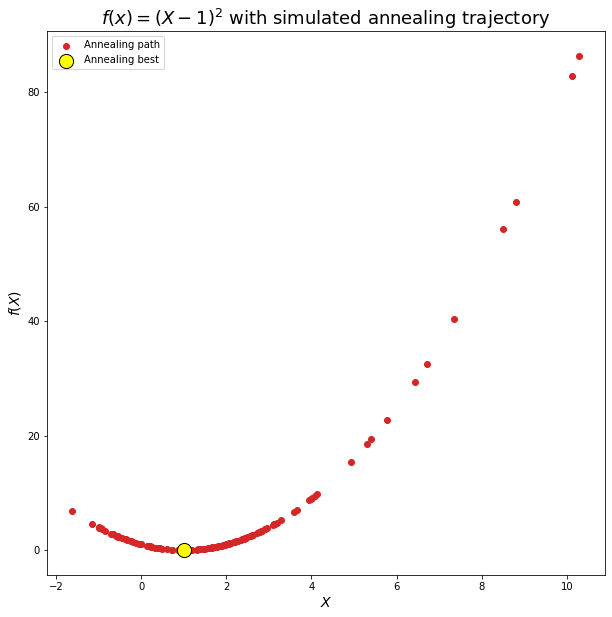

In [9]:
fig, ax = plt.subplots(figsize=(10,10))

#Annealing path
ax.scatter(x=coords[:,0], y=coords[:,1], color='tab:red', label='Annealing path')
ax.scatter(x=best[0], y=best[1], s=200, color='yellow', edgecolors='black', label='Annealing best')

#Style and annotations
ax.set_title(r"$f(x)=(X-1)^2$ with simulated annealing trajectory", fontsize=18)
ax.set_xlabel(r"$X$", fontsize=14)
ax.set_ylabel(r"$f(X)$", fontsize=14)
ax.legend()

plt.show()

# Función coseno

In [10]:
def cos_x2():
    def cos_x2_imp(x):
        return sum(np.abs(x) + np.cos(x))
    return cos_x2_imp

In [11]:
best, coords = simulated_annealing(
    f=cos_x2(), 
    x=2, 
    T=None, 
    t=annealing_schedule, 
    k_max=150, 
    temp=100)

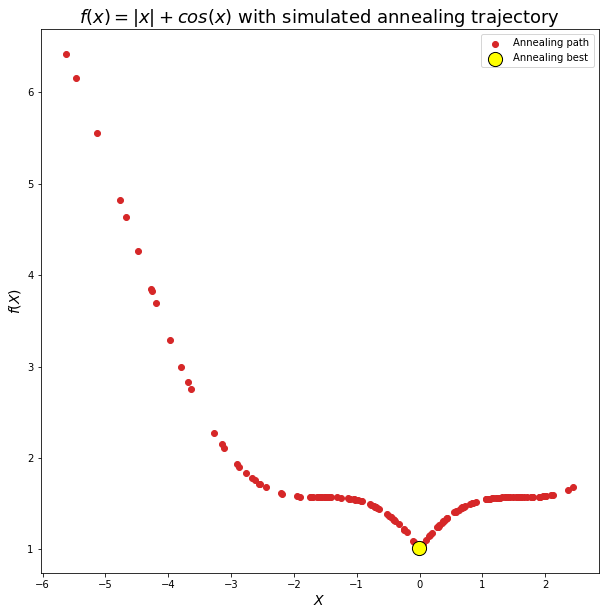

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

#Annealing path
ax.scatter(x=coords[:,0], y=coords[:,1], color='tab:red', label='Annealing path')
ax.scatter(x=best[0], y=best[1], s=200, color='yellow', edgecolors='black', label='Annealing best')

#Style and annotations
ax.set_title(r"$f(x)=|x| + cos(x)$ with simulated annealing trajectory", fontsize=18)
ax.set_xlabel(r"$X$", fontsize=14)
ax.set_ylabel(r"$f(X)$", fontsize=14)
ax.legend()

plt.show()